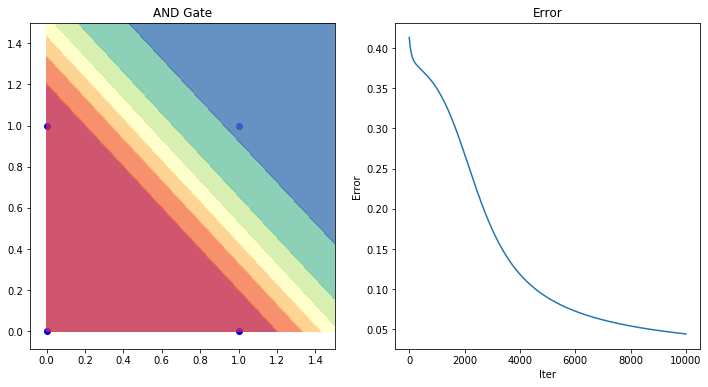

최종 예측: [0.00228281 0.04727218 0.04628192 0.91822412]


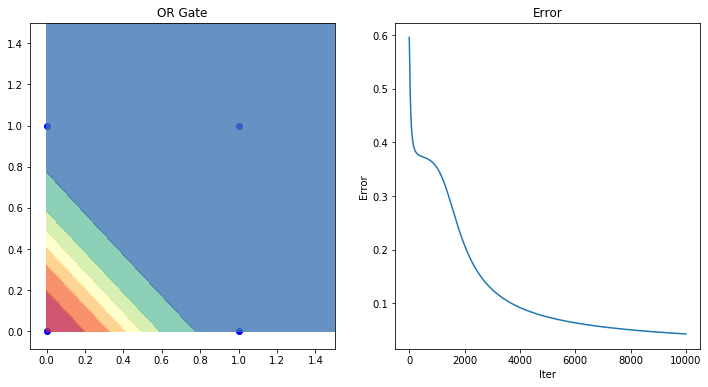

최종 예측: [0.05806251 0.9518115  0.95490526 0.97914458]


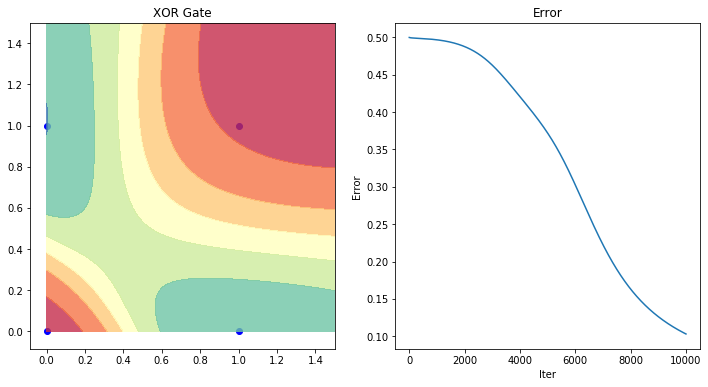

최종 예측: [0.07925258 0.90139084 0.89087453 0.12509718]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, hidden_node):
        # 모델 구조 정의
        self.input_node = 2 #2개의 input node
        self.hidden_node = hidden_node
        self.output_node = 1 #1개의 output node

        # 가중치와 편향 초기화
        self.weights_input_hidden = np.random.uniform(-1, 1, (self.input_node, self.hidden_node))
        self.biases_hidden = np.zeros((1, self.hidden_node))
        self.weights_hidden_output = np.random.uniform(-1, 1, (self.hidden_node, self.output_node))
        self.biases_output = np.zeros((1, self.output_node))

    #activation function으로 sigmoid 사용    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, X):
        # Forward propagation
        #x값에 가중치 곱하고 bias 더함
        hidden_input = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        hidden_output = self.sigmoid(hidden_input)
        # hidden 출력값에 가중치 계산
        output = np.dot(hidden_output, self.weights_hidden_output) + self.biases_output
        predicted_output = self.sigmoid(output)
        
        return predicted_output, hidden_output

    def backward_propagation(self, X, y, hidden_output, predicted_output, learning_rate):
        # Backpropagation
        error = y - predicted_output
        # 출력층 델타 값
        d_output = error * self.sigmoid_derivative(predicted_output)
        error_hidden = d_output.dot(self.weights_hidden_output.T)
        #hidden 델타 값
        d_hidden = error_hidden * self.sigmoid_derivative(hidden_output)

        # 가중치 및 편향 업데이트
        self.weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
        self.biases_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(d_hidden) * learning_rate
        self.biases_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, learning_rate, num_epochs):
        predicted_outputs = []
        errors = []  # 오차 저장 리스트

        for epoch in range(num_epochs):
            # Forward propagation
            predicted_output, hidden_output = self.forward_propagation(X)
            predicted_outputs.append(predicted_output.ravel())

            # Backpropagation
            self.backward_propagation(X, y, hidden_output, predicted_output, learning_rate)

            # 오차 계산 및 저장
            error = np.mean(np.abs(y - predicted_output))
            errors.append(error)

        return predicted_outputs, errors

    def predict(self, X):
        output, _ = self.forward_propagation(X)
        return output.ravel()

    def plot_learning_process(self, X, y, predicted_outputs, errors, title):
        plt.figure(figsize=(12, 6))

        # 입력 데이터 경계
        plt.subplot(1, 2, 1)

        plt.scatter([0,0,1,1], [0,1,1,0], c='blue', cmap=plt.cm.Spectral)

        # 분류 경계를 등고선으로 표시
        xx, yy = np.meshgrid(np.linspace(0, 1.5, 100), np.linspace(0, 1.5, 100))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

        plt.title(title)

        # 오차 변화 그래프
        plt.subplot(1, 2, 2)
        plt.plot(range(len(errors)), errors)
        plt.title("Error")
        plt.xlabel("Iter")
        plt.ylabel("Error")

        plt.show()

# 학습 설정
learning_rate = 0.05
num_iter = 10000

# AND 게이트 학습
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[0], [0], [0], [1]])

AND_model = Perceptron(2)
predicted_outputs, errors = AND_model.train(X, y_and, learning_rate, num_iter)
AND_model.plot_learning_process(X, y_and, predicted_outputs, errors, title="AND Gate")

# 최종 예측
print("최종 예측:",AND_model.predict(X))

# OR 게이트 학습
y_or = np.array([[0], [1], [1], [1]])

OR_model = Perceptron(2)
predicted_outputs, errors = OR_model.train(X, y_or, learning_rate, num_iter)
OR_model.plot_learning_process(X, y_and, predicted_outputs, errors, title="OR Gate")

# 최종 예측
print("최종 예측:",OR_model.predict(X))

# XOR 게이트 학습
y_xor = np.array([[0], [1], [1], [0]])

XOR_model = Perceptron(4)
predicted_outputs, errors = XOR_model.train(X, y_xor, learning_rate, num_iter)
XOR_model.plot_learning_process(X, y_and, predicted_outputs, errors, title="XOR Gate")
# 최종 예측
print("최종 예측:",XOR_model.predict(X))
